In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("../data/processed/limpio1.csv")

## PCA

### Train/Test

In [4]:
X = df.drop(columns=["Hair Loss"])
y = df["Hair Loss"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Escalado (Age)

In [5]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test_scaled["Age"] = scaler.transform(X_test[["Age"]])


### PCA

In [6]:
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Componentes retenidos: {pca.n_components_}")


Componentes retenidos: 33


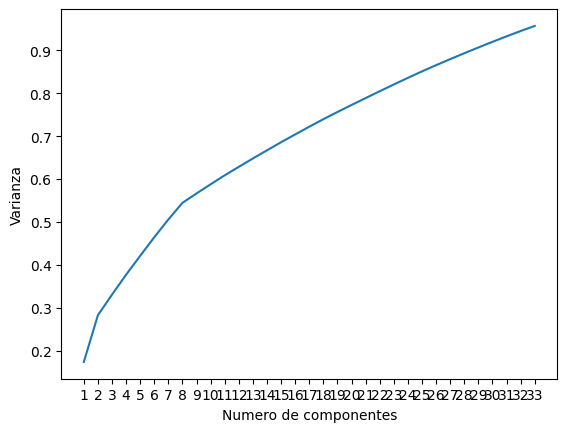

In [7]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index = np.arange(1, 34)))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza")
plt.xticks(np.arange(1, 34))
plt.show()

## KNN

### Entrenar

In [8]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicciones

In [9]:
y_pred = model.predict(X_test_pca)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.48      0.60      0.53        89
           1       0.60      0.48      0.53       111

    accuracy                           0.53       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.53      0.53       200



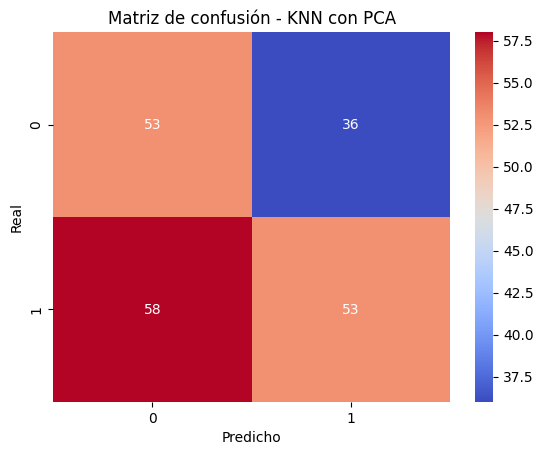

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = "coolwarm",annot= True)
#sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, cmap="Blues")
plt.title("Matriz de confusión - KNN con PCA")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


## PKL

In [12]:
import pickle

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_pca, y_train)

# Guardar el PCA
with open("../models/M6-PCA.pkl", "wb") as f:
    pickle.dump(pca, f)

# Guardar el modelo KNN
with open("../models/M6-knn.pkl", "wb") as f:
    pickle.dump(model, f)


In [13]:
# Cargar los modelos
with open("../models/M6-PCA.pkl", "rb") as f:
    pca_cargado = pickle.load(f)

with open("../models/M6-knn.pkl", "rb") as f:
    knn_cargado = pickle.load(f)

# Usarlos con datos nuevos (¡debes escalar primero!)
X_test_pca = pca_cargado.transform(X_test_scaled)
predicciones = knn_cargado.predict(X_test_pca)
